# Pakistan House Price Prediction Project

In [374]:
# Data Handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Transformations
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin 


# Machine Learning Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB

# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix

# Model Selection & Tuning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


import warnings
warnings.filterwarnings('ignore')  # Hide warnings for cleaner output


In [375]:
df = pd.read_csv('/Users/musabumair/Desktop/DATA/House Prediction/Entities.csv')
df.head()

,Unnamed: 0,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,NaN,NaN,1089.004
1,1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,NaN,NaN,15246.056
2,2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,7/17/2019,NaN,NaN,2178.008
3,3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,4/5/2019,NaN,NaN,10890.000
4,4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,7/10/2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.008


In [376]:
# Dropping column 'Unnamed:0' 
df = df.drop('Unnamed: 0', axis=1)
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,NaN,NaN,1089.004
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,NaN,NaN,15246.056
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,7/17/2019,NaN,NaN,2178.008
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,4/5/2019,NaN,NaN,10890.000
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,7/10/2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.008


# Exploratory Data Analysis

In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  purpose        168446 non-null  object 
 12  bedrooms       168446 non-null  int64  
 13  date_added     168446 non-null  object 
 14  agency         124375 non-null  object 
 15  agent          124374 non-null  object 
 16  Total_Area     168446 non-null  float64
dtypes: float64(3), int64(5), obje

In [378]:
# AGENCY AND AGENT HAS 26% MISSING VALUES
df.isnull().mean() * 100

property_id       0.000000
location_id       0.000000
page_url          0.000000
property_type     0.000000
price             0.000000
location          0.000000
city              0.000000
province_name     0.000000
latitude          0.000000
longitude         0.000000
baths             0.000000
purpose           0.000000
bedrooms          0.000000
date_added        0.000000
agency           26.163281
agent            26.163874
Total_Area        0.000000
dtype: float64

In [379]:
# Extract rows where both 'Agency' and 'Agent' are missing (NaN)
missing_rows = df[df['agency'].isna() | df['agent'].isna()]

# Display the result
missing_rows[['agency','agent']]

# Both agency and agent are missing 


,agency,agent
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
...,...,...
168347,NaN,NaN
168362,NaN,NaN
168374,NaN,NaN
168383,NaN,NaN


In [380]:
df.duplicated().sum()

0

In [381]:
df.describe()

,property_id,location_id,price,latitude,longitude,baths,bedrooms,Total_Area
count,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,1.684460e+05
mean,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,1.394239e+04
std,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,8.623647e+05
min,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000e+00
25%,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,1.905757e+03
50%,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,4.356016e+03
75%,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,1.197904e+04
max,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,3.387988e+08


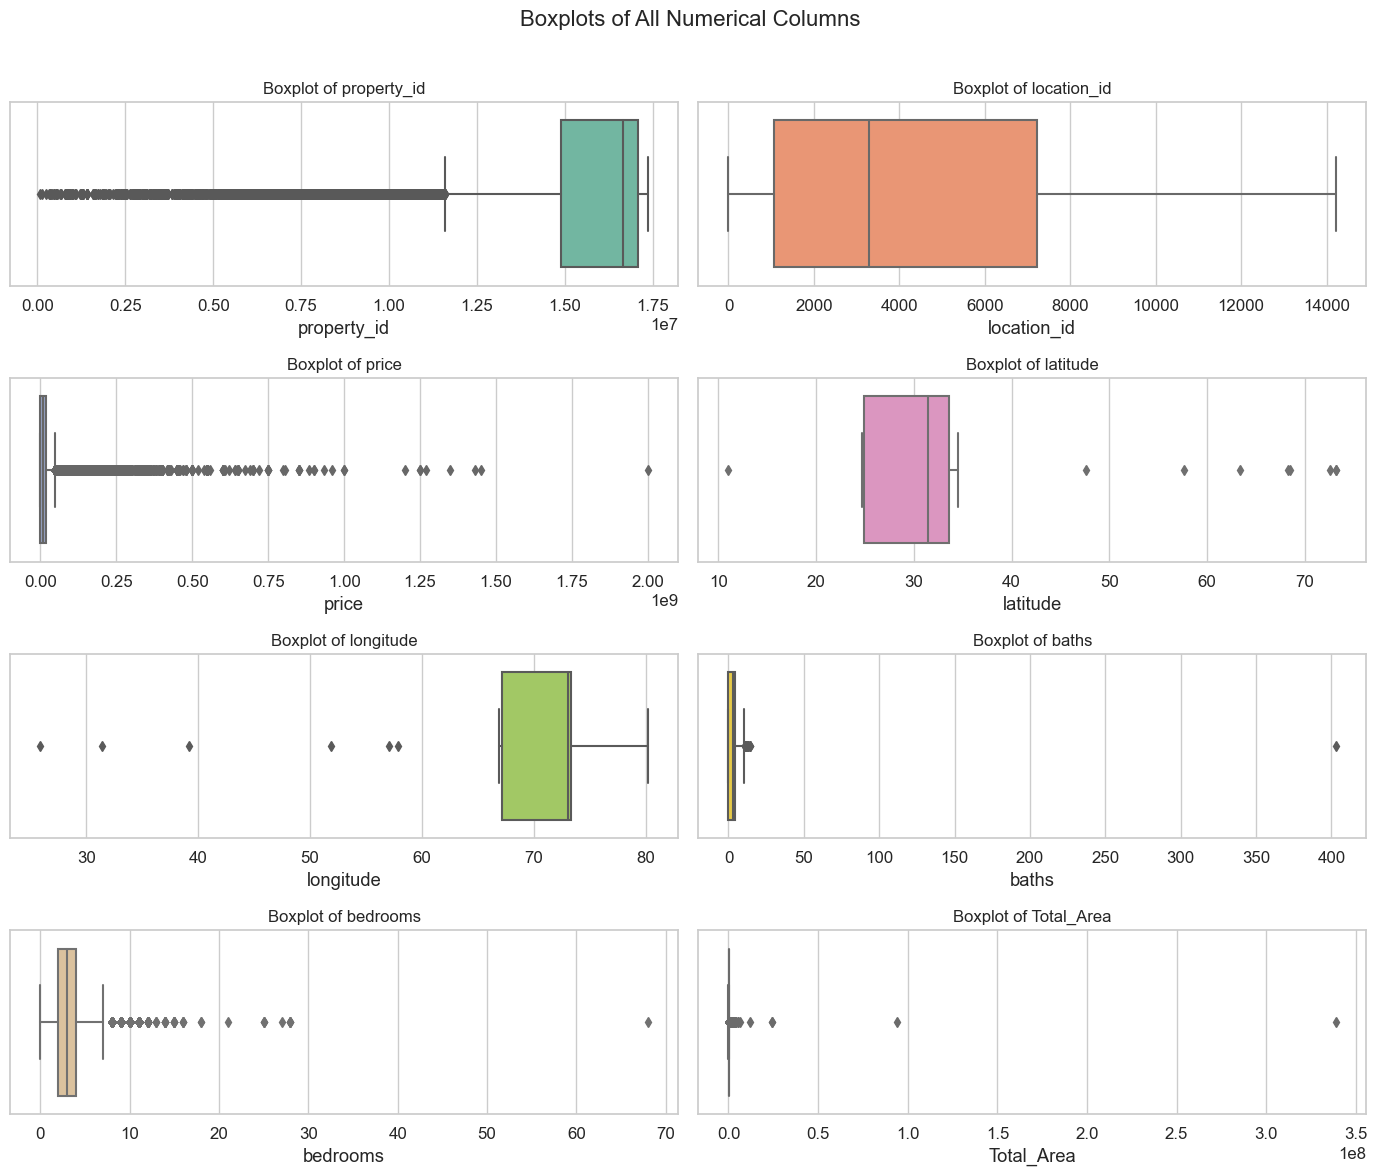

In [382]:
# Styling
sns.set(style="whitegrid", palette="Set2", font_scale=1.1)

# Select only numeric columns
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Calculate rows and columns for grid
n = len(numerical_cols)
cols = 2
rows = (n + 1) // cols

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(14, rows * 3))
axes = axes.flatten()

# Plot each boxplot
for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x=col, ax=axes[i], color=sns.color_palette("Set2")[i % 8])
    axes[i].set_title(f'Boxplot of {col}', fontsize=12)

# Improve layout
plt.suptitle('Boxplots of All Numerical Columns', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


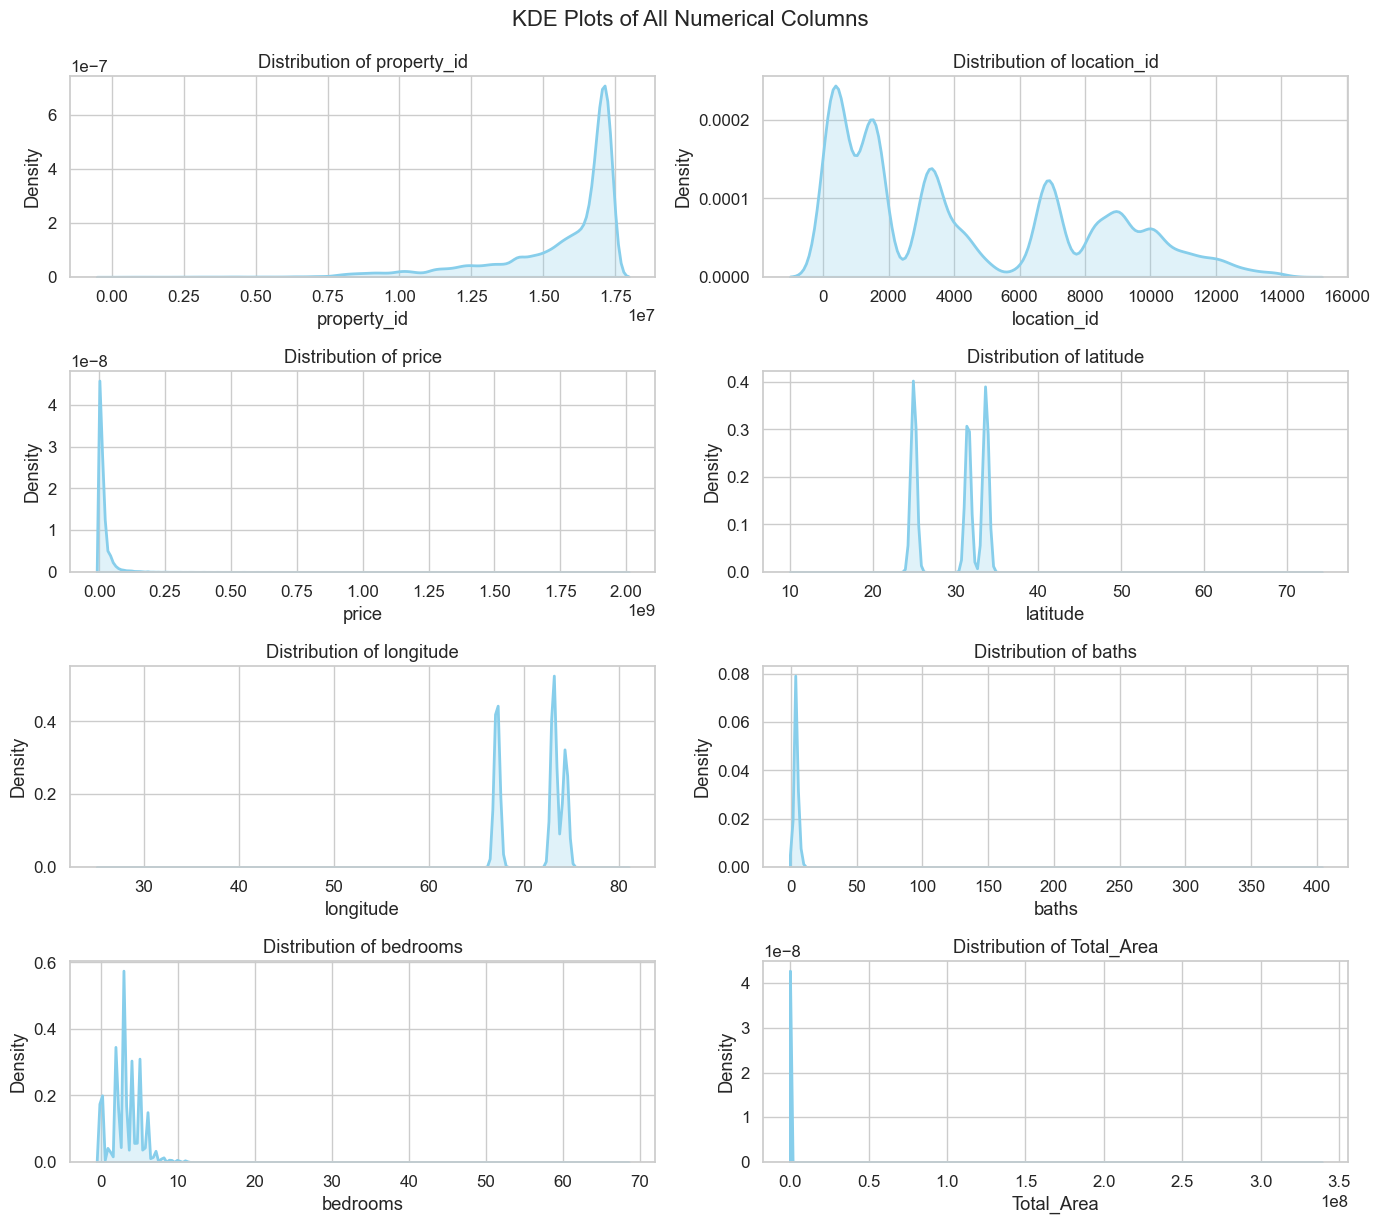

In [383]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set visual style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Select only numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Set up plot grid (2 columns)
n = len(numerical_cols)
cols = 2
rows = (n + 1) // cols

plt.figure(figsize=(14, rows * 3))

for i, col in enumerate(numerical_cols):
    plt.subplot(rows, cols, i + 1)
    sns.kdeplot(df[col], fill=True, color='skyblue', linewidth=2)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.grid(True)

plt.tight_layout()
plt.suptitle("KDE Plots of All Numerical Columns", fontsize=16, y=1.02)
plt.show()


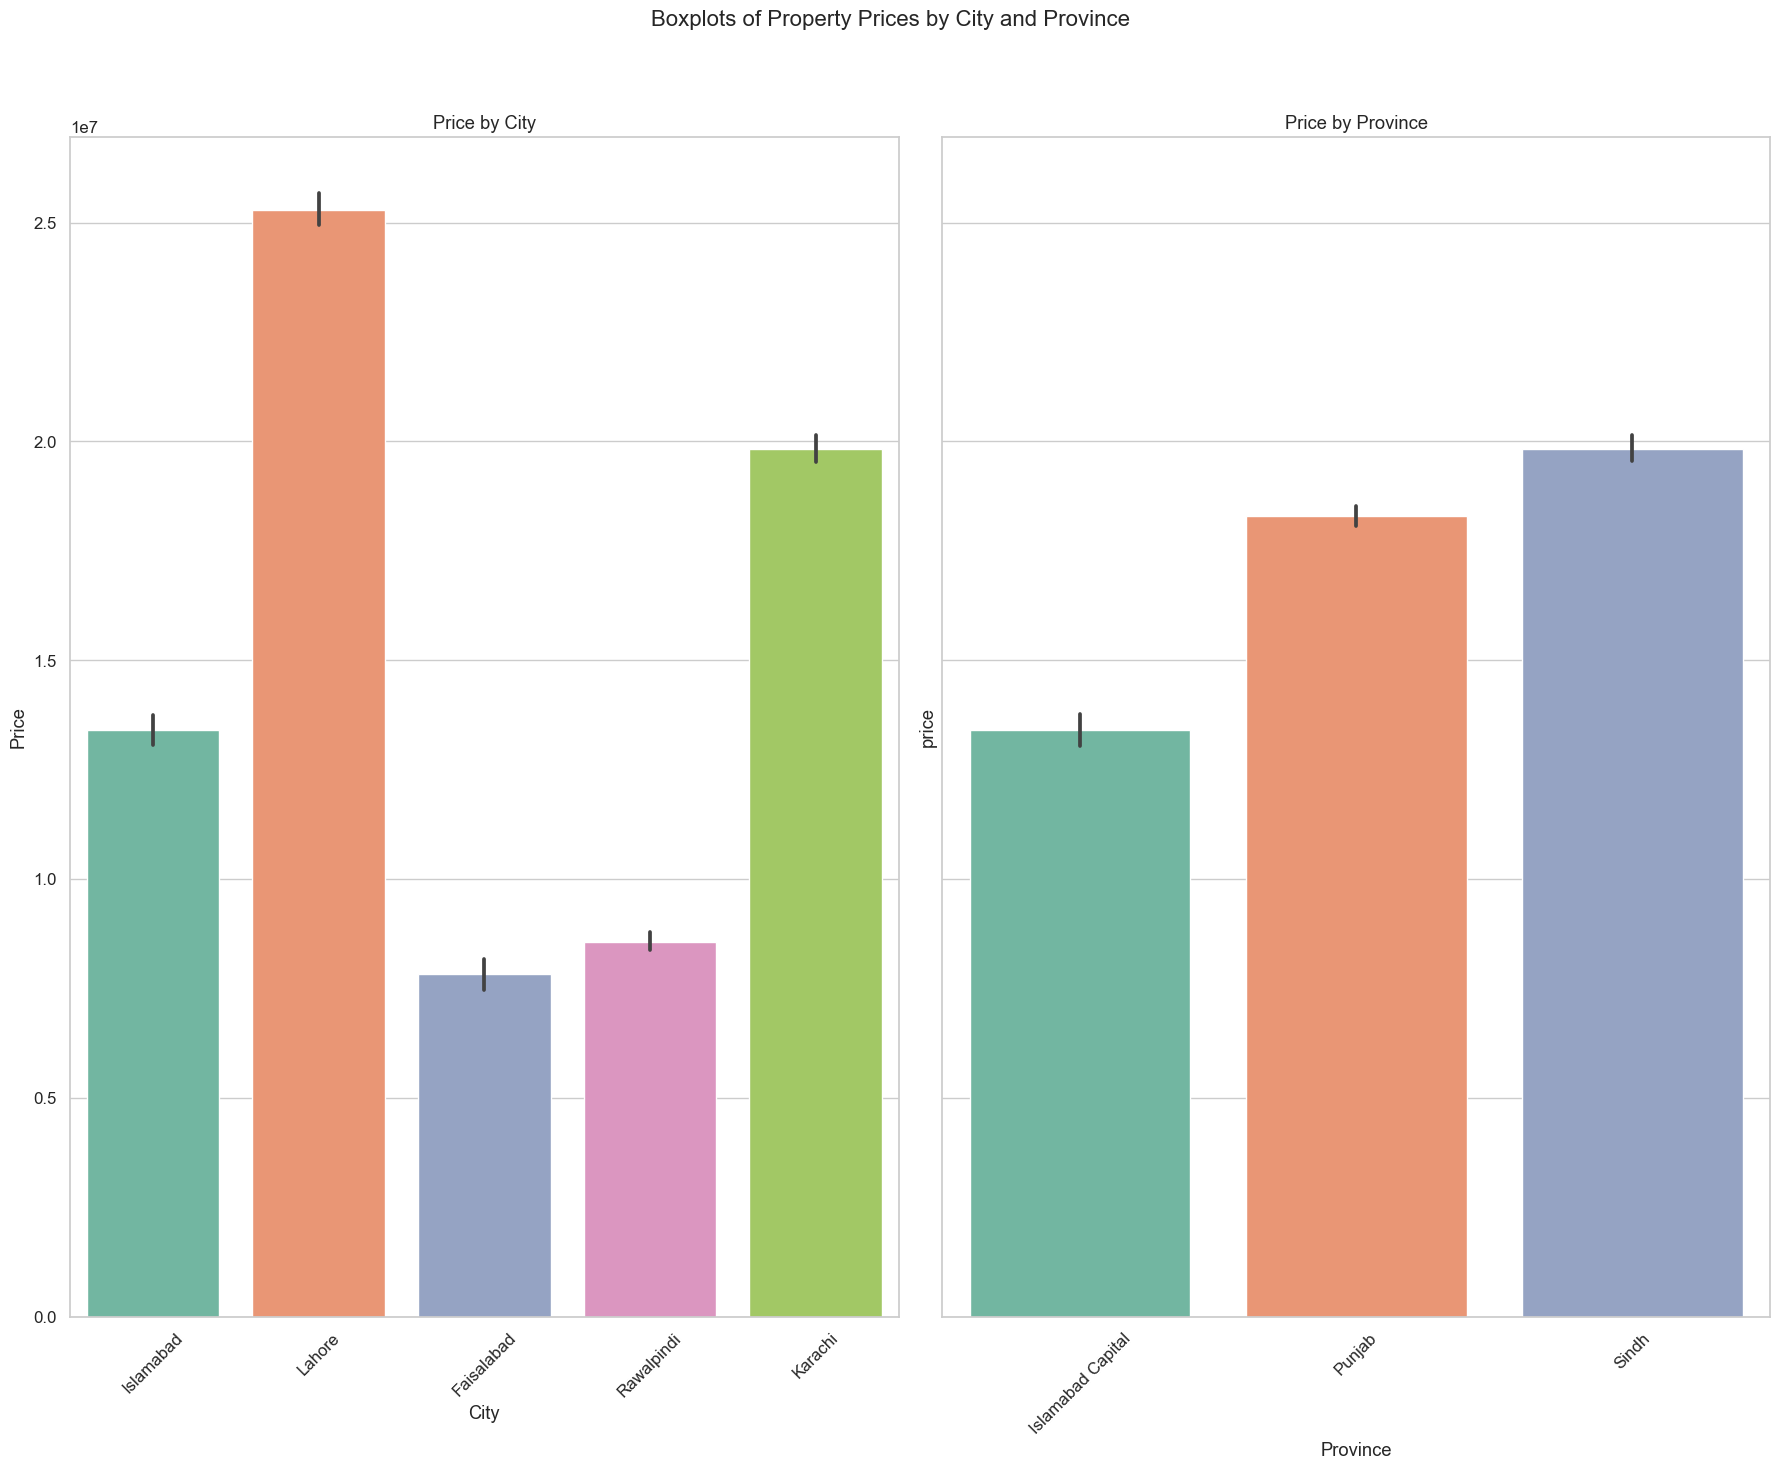

In [384]:
# Set Seaborn style
sns.set(style="whitegrid", palette="Set2", font_scale=1.1)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 15), sharey=True)

# Boxplot: Price by City
sns.barplot(x='city', y='price', data=df, ax=axes[0])
axes[0].set_title('Price by City')
axes[0].set_xlabel('City')
axes[0].set_ylabel('Price')
axes[0].tick_params(axis='x', rotation=45)

# Boxplot: Price by Province
sns.barplot(x='province_name', y='price', data=df, ax=axes[1])
axes[1].set_title('Price by Province')
axes[1].set_xlabel('Province')
axes[1].tick_params(axis='x', rotation=45)

plt.suptitle("Boxplots of Property Prices by City and Province", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


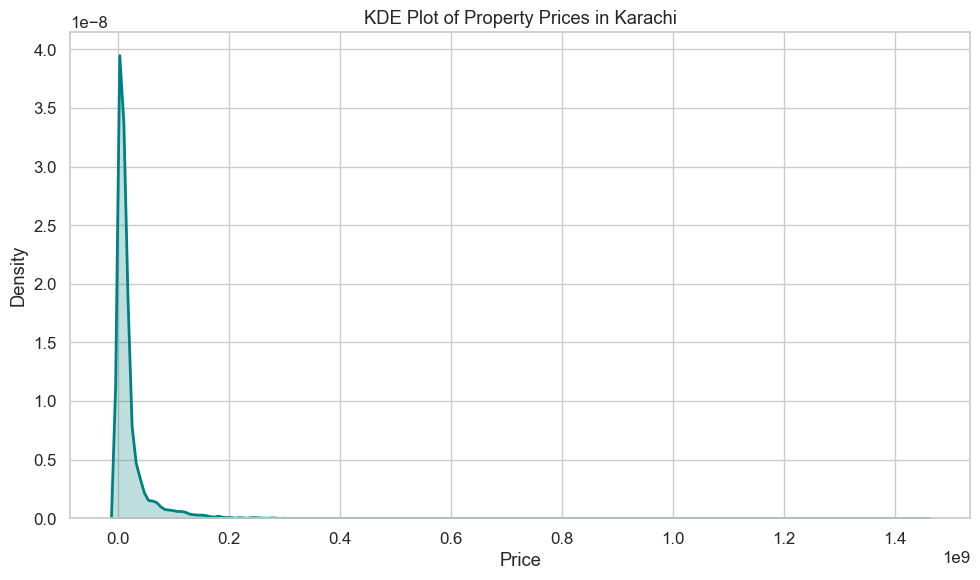

In [385]:
# Set the style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Filter rows where city is Karachi (case-insensitive)
karachi_df = df[df['city'].str.lower() == 'karachi'].copy()

# KDE Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(karachi_df['price'], fill=True, color='teal', linewidth=2)

plt.title("KDE Plot of Property Prices in Karachi")
plt.xlabel("Price")
plt.ylabel("Density")
plt.grid(True)
plt.tight_layout()
plt.show()


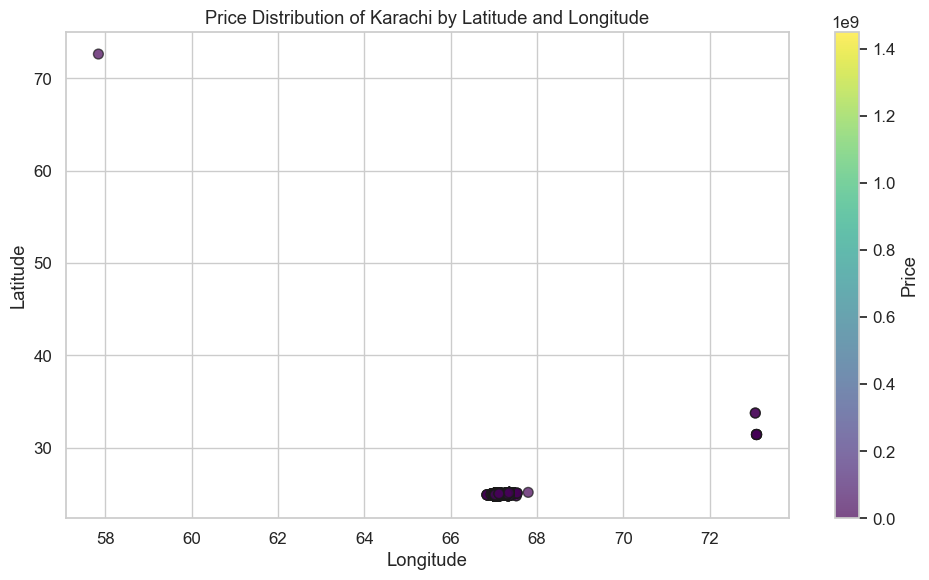

In [386]:
karachi_df = df[df['city'].str.lower() == 'karachi'].copy()

# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    karachi_df['longitude'],
    karachi_df['latitude'],
    c=karachi_df['price'],         # Color by price
    cmap='viridis',            # Color scale
    alpha=0.7,
    edgecolor='k',
    s=50                       # Marker size
)

plt.colorbar(scatter, label='Price')
plt.title('Price Distribution of Karachi by Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()


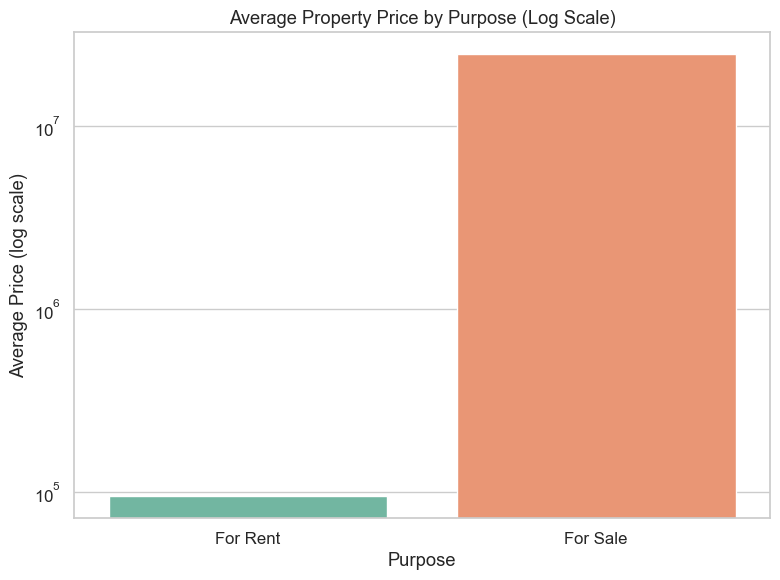

In [387]:
sns.set(style="whitegrid", palette="Set2", font_scale=1.1)

# Group by purpose and calculate mean price
purpose_avg = df.groupby('purpose')['price'].mean().reset_index()

# Plot with log scale
plt.figure(figsize=(8, 6))
sns.barplot(x='purpose', y='price', data=purpose_avg)

plt.yscale('log') 
plt.title('Average Property Price by Purpose (Log Scale)')
plt.xlabel('Purpose')
plt.ylabel('Average Price (log scale)')
plt.tight_layout()
plt.show()


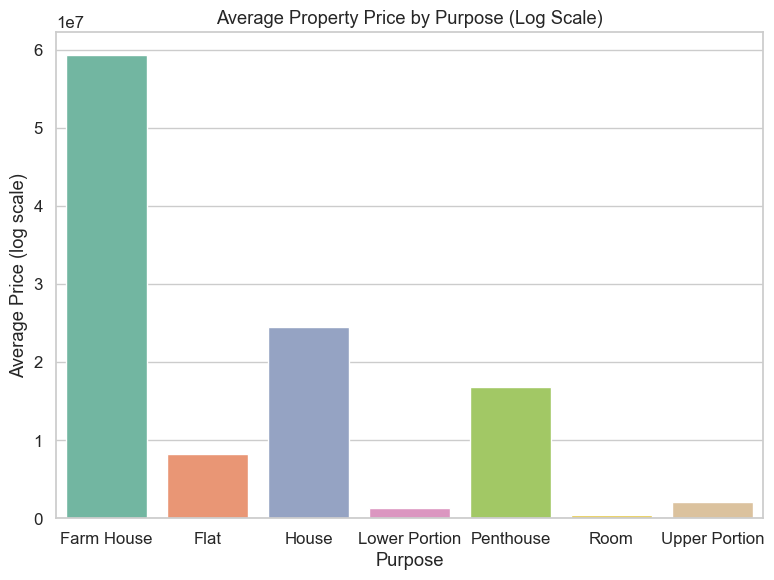

In [388]:
sns.set(style="whitegrid", palette="Set2", font_scale=1.1)

# Group by purpose and calculate mean price
purpose_avg = df.groupby('property_type')['price'].mean().reset_index()

# Plot with log scale
plt.figure(figsize=(8, 6))
sns.barplot(x='property_type', y='price', data=purpose_avg)

plt.title('Average Property Price by Purpose (Log Scale)')
plt.xlabel('Purpose')
plt.ylabel('Average Price (log scale)')
plt.tight_layout()
plt.show()


# Feature Selection

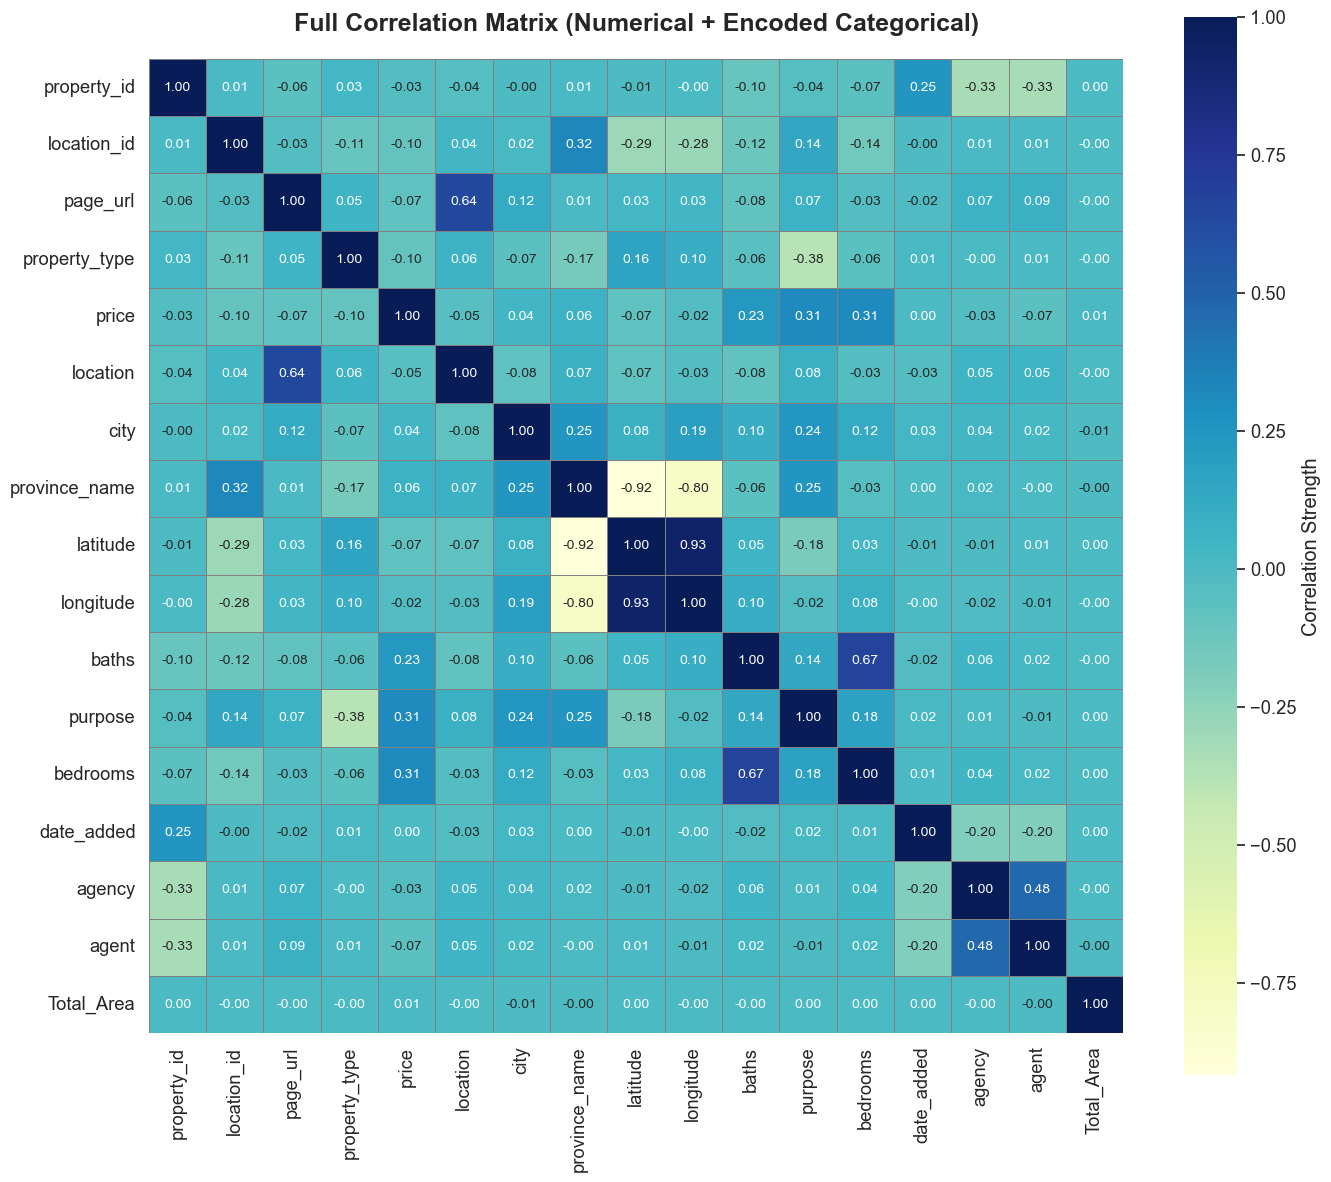

In [389]:
# Copy the original dataframe
df_encoded = df.copy()

# Label encode all object (categorical) columns
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

# Compute correlation matrix
corr_matrix = df_encoded.corr()

# Set figure size and visual style
plt.figure(figsize=(14, 14))
sns.set(style="white", font_scale=1.2)

# Create the full heatmap (no mask)
heatmap = sns.heatmap(
    corr_matrix,
    cmap="YlGnBu",              # Smooth green-blue palette
    annot=True,
    fmt=".2f",
    linewidths=0.7,
    linecolor='gray',
    square=True,
    cbar_kws={"shrink": 0.8, "label": "Correlation Strength"},
    annot_kws={"size": 10}
)

# Add title and formatting
plt.title("Full Correlation Matrix (Numerical + Encoded Categorical)", fontsize=18, weight='bold', pad=20)
plt.tight_layout()
plt.show()


In [390]:
df_feature = df.drop(['property_id', 'location_id', 'page_url','location','date_added','agency','agent'], axis=1)

In [391]:
df_feature[df_feature['baths']>400]

,property_type,price,city,province_name,latitude,longitude,baths,purpose,bedrooms,Total_Area
129605,House,15000000,Rawalpindi,Punjab,33.638847,73.048089,403,For Sale,6,1361.255


In [392]:
#removing outlier
df_feature.drop(index=129605,inplace=True)

# Model Training

In [393]:
# Define features (X) and target variable (y)
X = df_feature.drop('price', axis=1)   # Replace 'Price' with your target column
y = df_feature['price']

In [394]:
# Find categorical columns
categorical_cols = X.select_dtypes(include='object').columns

# Dictionary to store encoders (useful for inverse_transform later)
encoders = {}

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    encoders[col] = le  # Save encoder for later use if needed

# Result
print("Categorical columns encoded successfully.")
print(X.head())


Categorical columns encoded successfully.
   property_type  city  province_name   latitude  longitude  baths  purpose  \
0              1     1              0  33.679890  73.012640      2        1   
1              1     1              0  33.700993  72.971492      3        1   
2              2     1              0  33.631486  72.926559      6        1   
3              2     1              0  33.707573  73.151199      4        1   
4              2     1              0  33.492591  73.301339      3        1   

   bedrooms  Total_Area  
0         2    1089.004  
1         3   15246.056  
2         5    2178.008  
3         4   10890.000  
4         3    2178.008  


In [395]:
# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 20% test size
    random_state=42       # Reproducibility
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (134756, 9)
Test shape: (33689, 9)


In [396]:
# Define models to try
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Support Vector Regressor': SVR()
}

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)

    # Print results
    print(f"\nModel: {name}")
    print(f"R² Score: {r2:.3f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")



Model: Linear Regression
R² Score: 0.180
RMSE: 30246990.00
MAE: 15039903.74

Model: Random Forest
R² Score: 0.835
RMSE: 13554533.83
MAE: 3290012.25

Model: K-Nearest Neighbors
R² Score: 0.688
RMSE: 18645100.05
MAE: 4852895.31

Model: Support Vector Regressor
R² Score: -0.074
RMSE: 34614140.99
MAE: 15261470.55
